In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras import metrics
import tensorflow as tf
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.regularizers import l2
from keras.layers import MaxPooling2D
from copy import deepcopy
import statistics
from statistics import mean 
import time
from minisom import MiniSom
from hyperopt import fmin, tpe, hp
import time

Using TensorFlow backend.


In [2]:
nex_nq500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nq500.txt", header = None, delim_whitespace=True)
nex_nqv2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nqv2m.txt", header = None, delim_whitespace=True)
nex_nqv10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nqv10m.txt", header = None, delim_whitespace=True)
nex_nrh500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nrh500.txt", header = None, delim_whitespace=True)
nex_nrh700 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nrh700.txt", header = None, delim_whitespace=True)
nex_nt2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nt2m.txt", header = None, delim_whitespace=True)
nex_nt2mdew = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nt2mdew.txt", header = None, delim_whitespace=True)
nex_nt10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nt10m.txt", header = None, delim_whitespace=True)
nex_nt500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nt500.txt", header = None, delim_whitespace=True)
nex_ntpw = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_ntpw.txt", header = None, delim_whitespace=True)
nex_nu2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nu2m.txt", header = None, delim_whitespace=True)
nex_nu10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nu10m.txt", header = None, delim_whitespace=True)
nex_nu500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nu500.txt", header = None, delim_whitespace=True)
nex_nuqv = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nuqv.txt", header = None, delim_whitespace=True)
nex_nv2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nv2m.txt", header = None, delim_whitespace=True)
nex_nv10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nv10m.txt", header = None, delim_whitespace=True)
nex_nv500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nv500.txt", header = None, delim_whitespace=True)
nex_nvqv = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nvqv.txt", header = None, delim_whitespace=True)
nex_nw500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_nex_nw500.txt", header = None, delim_whitespace=True)

ex_nq500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nq500.txt", header = None, delim_whitespace=True)
ex_nqv2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nqv2m.txt", header = None, delim_whitespace=True)
ex_nqv10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nqv10m.txt", header = None, delim_whitespace=True)
ex_nrh500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nrh500.txt", header = None, delim_whitespace=True)
ex_nrh700 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nrh700.txt", header = None, delim_whitespace=True)
ex_nt2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nt2m.txt", header = None, delim_whitespace=True)
ex_nt2mdew = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nt2mdew.txt", header = None, delim_whitespace=True)
ex_nt10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nt10m.txt", header = None, delim_whitespace=True)
ex_nt500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nt500.txt", header = None, delim_whitespace=True)
ex_ntpw = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_ntpw.txt", header = None, delim_whitespace=True)
ex_nu2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nu2m.txt", header = None, delim_whitespace=True)
ex_nu10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nu10m.txt", header = None, delim_whitespace=True)
ex_nu500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nu500.txt", header = None, delim_whitespace=True)
ex_nuqv = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nuqv.txt", header = None, delim_whitespace=True)
ex_nv2m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nv2m.txt", header = None, delim_whitespace=True)
ex_nv10m = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nv10m.txt", header = None, delim_whitespace=True)
ex_nv500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nv500.txt", header = None, delim_whitespace=True)
ex_nvqv = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nvqv.txt", header = None, delim_whitespace=True)
ex_nw500 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_8005_ex_nw500.txt", header = None, delim_whitespace=True)


nq500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nq500.txt", header = None, delim_whitespace=True)
nqv2m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nqv2m.txt", header = None, delim_whitespace=True)
nqv10m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nqv10m.txt", header = None, delim_whitespace=True)
nrh500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nrh500.txt", header = None, delim_whitespace=True)
nrh700_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nrh700.txt", header = None, delim_whitespace=True)
nt2m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nt2m.txt", header = None, delim_whitespace=True)
nt2mdew_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nt2mdew.txt", header = None, delim_whitespace=True)
nt10m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nt10m.txt", header = None, delim_whitespace=True)
nt500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nt500.txt", header = None, delim_whitespace=True)
ntpw_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_ntpw.txt", header = None, delim_whitespace=True)
nu2m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nu2m.txt", header = None, delim_whitespace=True)
nu10m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nu10m.txt", header = None, delim_whitespace=True)
nu500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nu500.txt", header = None, delim_whitespace=True)
nuqv_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nuqv.txt", header = None, delim_whitespace=True)
nv2m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nv2m.txt", header = None, delim_whitespace=True)
nv10m_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nv10m.txt", header = None, delim_whitespace=True)
nv500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nv500.txt", header = None, delim_whitespace=True)
nvqv_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nvqv.txt", header = None, delim_whitespace=True)
nw500_0619 = pd.read_csv("../../MWST_99per/Test_Data/JJA_MWST_0619_nw500.txt", header = None, delim_whitespace=True)

indicator_0619 = pd.read_csv("../../MWST_99per/JJA_MWST_99per_0619_indicator.txt", header = None, delim_whitespace=True)
test_set_y_initial = indicator_0619[4]
test_y = test_set_y_initial.to_numpy().reshape(1, test_set_y_initial.shape[0])

In [3]:
def train_som(x, y, input_len, sigma, learning_rate, data):
    som = MiniSom(x=x,
              y=y,
              input_len = input_len,
              sigma = sigma,
              learning_rate = learning_rate              
             )
    som.random_weights_init(data)
    start_time = time.time()
    som.train_random(data, iterations)
    elapsed_time = time.time() - start_time
    print(elapsed_time, "seconds")
    return som

def plot_som(som, data, target):
    plt.figure(figsize = (16,12))
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o','s','D']
    colors = ['r','g','b']
    for cnt, xx in enumerate(data):
        w = som.winner(xx)
        plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor = 'None', markeredgecolor = colors[target[cnt]],
            markersize = 12, markeredgewidth = 2)
    axis([0,som._weights.shape[0], 0,som._weights.shape[1]])
    show()

In [178]:
def get_train_test_balanced(nex_names, ex_names, test_names):
    nex_combo_7905 = pd.concat(nex_names, axis = 1)
    nex_combo_7905["label"] = 0

    ex_combo_7905 = pd.concat(ex_names, axis = 1)
    ex_combo_7905["label"] = 1

    combo_7905_df = pd.concat([ex_combo_7905, nex_combo_7905])

    train_combo_y_initial = combo_7905_df['label'].to_numpy()
    #train_combo_y = train_combo_y_initial.reshape(1, train_combo_y_initial.shape[0])
    train_combo_x = combo_7905_df.iloc[:,0:combo_7905_df.shape[1]-1].to_numpy()

    test_df = pd.concat(test_names, axis = 1)

    test_combo_x = test_df.to_numpy()

#     over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.652)
#     steps = [('o', over), ('u', under)]
#     steps = [('u', under)]
#     pipeline = Pipeline(steps=steps)
    #transform the dataset
#     train_combo_x, train_combo_y = pipeline.fit_resample(train_combo_x, train_combo_y_initial)
    train_combo_x, train_combo_y = under.fit_resample(train_combo_x, train_combo_y_initial)
    train_combo_x, train_combo_y = shuffle(train_combo_x, train_combo_y, random_state = 0)
    #summarize the new class distribution
    train_combo_y = train_combo_y.reshape(1, train_combo_y.shape[0])
    #print(train_combo_y)
    return train_combo_x, test_combo_x, train_combo_y

In [179]:
def conf_matrix(predictions, y):
    cm = np.zeros((2,2), dtype = int)
    for i in range(y.shape[1]):
        if(y[0,i] == 1 and predictions[0,i] == 1):
            cm[0,0] += 1
        if(y[0,i] == 1 and predictions[0,i] == 0):
            cm[0,1] += 1
        if(y[0,i] == 0 and predictions[0,i] == 1):
            cm[1,0] += 1
        if(y[0,i] == 0 and predictions[0,i] == 0):
            cm[1,1] += 1
    return cm

def evalmetrics(cm):
    tp = cm[0,0]
    fn = cm[0,1]
    fp = cm[1,0]
    tn = cm[1,1]

    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    precision = tp/(tp+fp)
    f1 = 2*precision*tpr/(precision + tpr)

    return tpr, fpr, f1

def create_model():
    model = Sequential()
    #add model layers
    model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(29,33,channels), activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    return model

def pred_train(predictions_train, shape):
    preds_train = np.zeros((1, shape[0]))
    for i in range(len(predictions_train)):

        first = predictions_train[i,0]
        second = predictions_train[i,1]

        if(first > second):
            preds_train[0,i] = 0
        else:
            preds_train[0,i] = 1
    return preds_train

def pred_test(predictions_test, shape):
    preds_test = np.zeros((1, 1263))
    for i in range(len(predictions_test)):

        first = predictions_test[i,0]
        second = predictions_test[i,1]

        if(first > second):
            preds_test[0,i] = 0
        else:
            preds_test[0,i] = 1
    return preds_test


In [180]:
def classify(som, train_x, train_y, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(train_x, train_y)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [223]:
def som_analysis(nex, ex, test):
    train_x, test_x, train_y = get_train_test_balanced(nex, ex, test)
    train_y = train_y.reshape((train_y.shape[1],))
    print(train_y.shape)
    print(np.sum(train_y))

    som = MiniSom(5, 7, train_x.shape[1], sigma=1.5, learning_rate=0.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

    som.train(train_x, 1000, verbose=True)
    label_names = {0:'Non-Extreme', 1:'Extreme'}
    w_x, w_y = zip(*[som.winner(d) for d in train_x])
    w_x = np.array(w_x)
    w_y = np.array(w_y)
    colors = ['C0', 'C1']
    plt.figure(figsize=(10, 9))
    plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
    plt.colorbar()

    for c in np.unique(train_y):
        idx_target = train_y==c
        plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                    w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                    s=50, c=colors[c-1], label=label_names[c])
    plt.legend(loc='upper right')
    plt.grid()
    # plt.savefig('resulting_images/som_seed.png')
    plt.show()
    result = classify(som, train_x, train_y, test_x)
    result = np.array(result)
    cm_test = conf_matrix(result.reshape((1, result.shape[0])), test_y)
    confusion_test = pd.DataFrame(cm_test, index=['actual_extreme (140)', 'actual_non-extreme (1248)'],
                             columns=['predicted_extreme','predicted_non-extreme'])

    display(confusion_test)
    tpr, fpr, f1 = evalmetrics(cm_test)
    print("True positive rate: %f" %(tpr))
    print("False positive rate: %f" %(fpr))
    print("F1 score: %f" %(f1))

(413,)
163
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 17.630318198355642


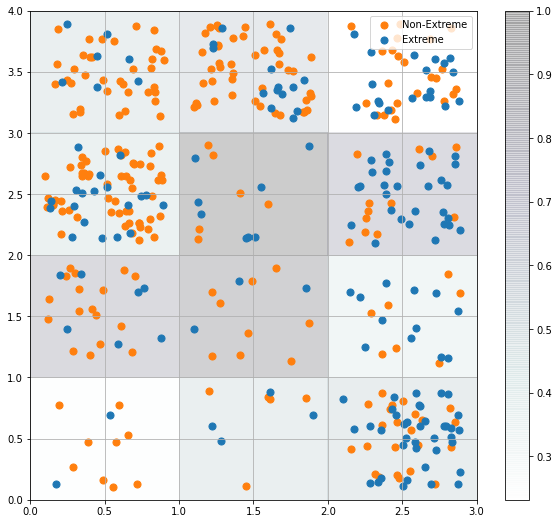

,predicted_extreme,predicted_non-extreme
actual_extreme (140),62,78
actual_non-extreme (1248),243,905


True positive rate: 0.442857
False positive rate: 0.211672
F1 score: 0.278652


In [218]:
# 
som_analysis([nex_nvqv], [ex_nvqv], [nvqv_0619])

(413,)
163
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 16.564329371336676


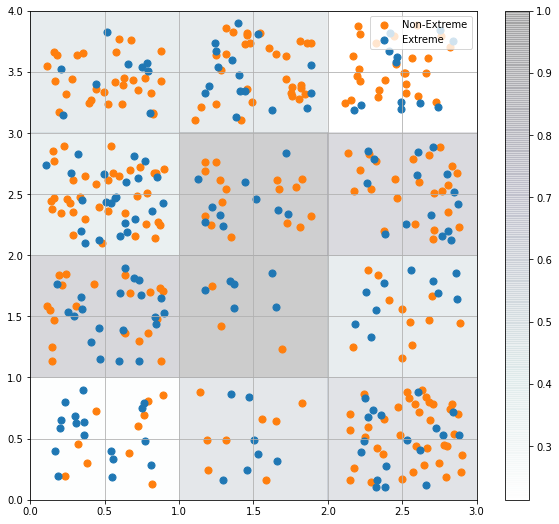

,predicted_extreme,predicted_non-extreme
actual_extreme (140),16,124
actual_non-extreme (1248),56,1092


True positive rate: 0.114286
False positive rate: 0.048780
F1 score: 0.150943


In [222]:
som_analysis([nex_nt2mdew], [ex_nt2mdew], [nt2mdew_0619])

(413,)
163
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 31.396525462657383


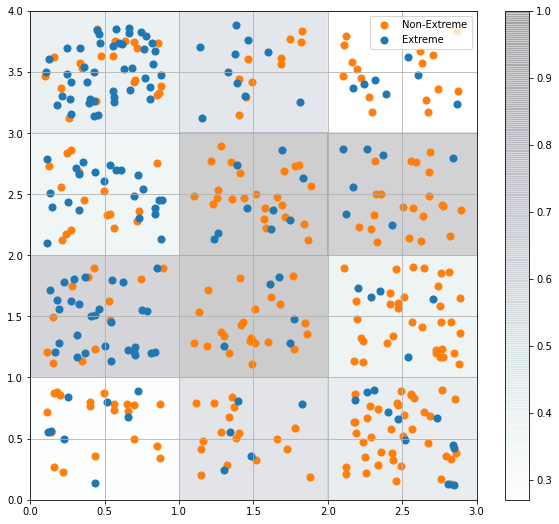

,predicted_extreme,predicted_non-extreme
actual_extreme (140),70,70
actual_non-extreme (1248),210,938


True positive rate: 0.500000
False positive rate: 0.182927
F1 score: 0.333333


In [221]:
som_analysis([nex_nvqv, nex_nv10m, nex_nuqv], [ex_nvqv, ex_nv10m, ex_nuqv], [nvqv_0619, nv10m_0619, nuqv_0619])

(413,)
163
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 16.28491230946313


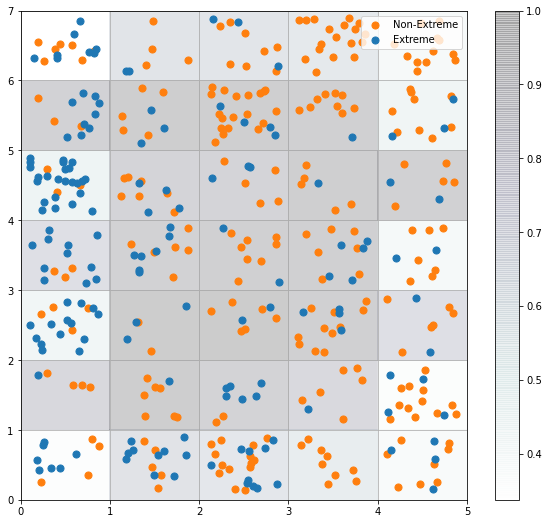

,predicted_extreme,predicted_non-extreme
actual_extreme (140),69,71
actual_non-extreme (1248),263,885


True positive rate: 0.492857
False positive rate: 0.229094
F1 score: 0.292373


In [228]:
som_analysis([nex_nvqv], [ex_nvqv], [nvqv_0619])

(413,)
163
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 15.469947000643907


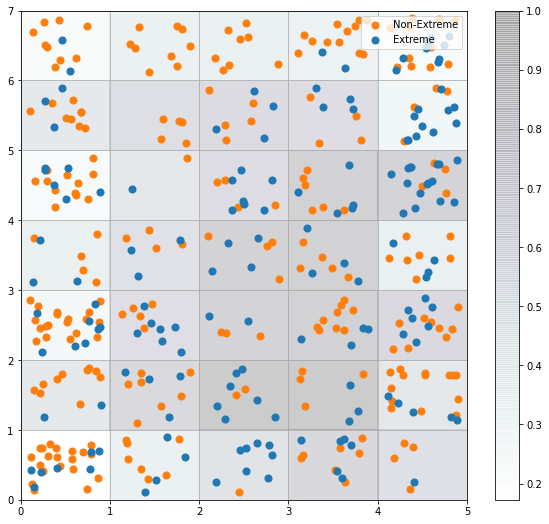

,predicted_extreme,predicted_non-extreme
actual_extreme (140),32,108
actual_non-extreme (1248),138,1010


True positive rate: 0.228571
False positive rate: 0.120209
F1 score: 0.206452


In [229]:
som_analysis([nex_nt2mdew], [ex_nt2mdew], [nt2mdew_0619])